In [62]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
df= pd.read_csv("Crash_Analysis_System_(CAS)_data.csv")

In [5]:
df.head()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashRoadSideRoad,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,holiday,houseOrBuilding,intersection,kerb,light,meshblockId,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,pedestrian,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,temporarySpeedLimit,tlaId,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1406914.0,4915023.0,1,NaN,602800.0,0.0,NaN,0.0,1.0,NaN,Null,2000/2001,MIDLAND ST,PORTSMOUTH DRIVE,NaN,Non-Injury Crash,No,2000,NaN,East,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,2895200.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Otago Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,70.0,NaN,Null,0.0,0.0,NaN,71.0,Dunedin City,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
1,1799023.0,5814728.0,2,NaN,528900.0,0.0,NaN,0.0,3.0,NaN,North,2011/2012,SH 1N,KILLARNEY ROAD,NaN,Non-Injury Crash,Yes,2012,NaN,South,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Bright sun,915900.0,0.0,0.0,0.0,4.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Waikato Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,60.0,NaN,Null,0.0,0.0,NaN,16.0,Hamilton City,Unknown,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
2,1741193.0,5976099.0,3,55.0,506660.0,0.0,0.0,0.0,1.0,1.0,North,2006/2007,SH 1N,SAUNDERS ROAD,NaN,Non-Injury Crash,Yes,2007,0.0,North,0.0,0.0,0.0,Flat,0.0,NaN,0.0,NaN,0.0,Twilight,136700.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Auckland Region,Bridge,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,NaN,76.0,Auckland,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,Null
3,1790288.0,5837387.0,4,NaN,526601.0,0.0,0.0,0.0,1.0,1.0,North,2006/2007,RIVERVIEW ROAD,HAKARIMATA ROAD,NaN,Non-Injury Crash,No,2006,0.0,North,0.0,0.0,0.0,Flat,0.0,NaN,0.0,NaN,0.0,Overcast,852200.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Waikato Region,Nil,2-way,Sealed,0.0,0.0,0.0,0.0,100.0,0.0,None,0.0,0.0,NaN,13.0,Waikato District,Nil,0.0,0.0,0.0,0.0,0.0,0.0,Open,0.0,0.0,0.0,Light rain,Null
4,1615675.0,5423627.0,5,NaN,584201.0,0.0,NaN,0.0,2.0,NaN,Null,2003/2004,TALBOT ST,ELIZABETH ST,NaN,Non-Injury Crash,No,2003,NaN,West,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,2361500.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Tasman Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,Null,0.0,0.0,NaN,51.0,Tasman District,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null


In [6]:
df.shape

(758757, 72)

In [7]:
df.crashSeverity.value_counts()

Non-Injury Crash    534058
Minor Crash         174849
Serious Crash        42884
Fatal Crash           6966
Name: crashSeverity, dtype: int64

In [8]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'advisorySpeed', 'areaUnitID', 'bicycle',
       'bridge', 'bus', 'carStationWagon', 'cliffBank',
       'crashDirectionDescription', 'crashFinancialYear', 'crashLocation1',
       'crashLocation2', 'crashRoadSideRoad', 'crashSeverity',
       'crashSHDescription', 'crashYear', 'debris', 'directionRoleDescription',
       'ditch', 'fatalCount', 'fence', 'flatHill', 'guardRail', 'holiday',
       'houseOrBuilding', 'intersection', 'kerb', 'light', 'meshblockId',
       'minorInjuryCount', 'moped', 'motorcycle', 'NumberOfLanes',
       'objectThrownOrDropped', 'otherObject', 'otherVehicleType', 'overBank',
       'parkedVehicle', 'pedestrian', 'phoneBoxEtc', 'postOrPole', 'region',
       'roadCharacter', 'roadLane', 'roadSurface', 'roadworks', 'schoolBus',
       'seriousInjuryCount', 'slipOrFlood', 'speedLimit', 'strayAnimal',
       'streetLight', 'suv', 'taxi', 'temporarySpeedLimit', 'tlaId', 'tlaName',
       'trafficControl', 'trafficIsland', 'trafficSi

In [9]:
df.advisorySpeed.isnull().any()

True

In [10]:
df['bicycle'].fillna(0,inplace=True)
df['bus'].fillna(0,inplace=True)
df['carStationWagon'].fillna(0,inplace=True)
df['moped'].fillna(0,inplace=True)
df['motorcycle'].fillna(0,inplace=True)
df['otherVehicleType'].fillna(0,inplace=True)
df['schoolBus'].fillna(0,inplace=True)
df['suv'].fillna(0,inplace=True)
df['taxi'].fillna(0,inplace=True)
df['truck'].fillna(0,inplace=True)
df['unknownVehicleType'].fillna(0,inplace=True)
df['vanOrUtility'].fillna(0,inplace=True)
df['bridge'].fillna(0,inplace=True)
df['cliffBank'].fillna(0,inplace=True)
df['debris'].fillna(0,inplace=True)
df['ditch'].fillna(0,inplace=True)
df['fence'].fillna(0,inplace=True)
df['truck'].fillna(0,inplace=True)
df['guardRail'].fillna(0,inplace=True)
df['houseOrBuilding'].fillna(0,inplace=True)
df['kerb'].fillna(0,inplace=True)
df['NumberOfLanes'].fillna(1,inplace=True)
df['objectThrownOrDropped'].fillna(0,inplace=True)
df['otherObject'].fillna(0,inplace=True)
df['overBank'].fillna(0,inplace=True)
df['parkedVehicle'].fillna(0,inplace=True)
df['phoneBoxEtc'].fillna(0,inplace=True)
df['postOrPole'].fillna(0,inplace=True)
df['roadworks'].fillna(0,inplace=True)
df['slipOrFlood'].fillna(0,inplace=True)
df['speedLimit'].fillna(0,inplace=True)
df['strayAnimal'].fillna(0,inplace=True)
df['train'].fillna(0,inplace=True)
df['tree'].fillna(0,inplace=True)
df['vehicle'].fillna(0,inplace=True)
df['trafficIsland'].fillna(0,inplace=True)
df['trafficSign'].fillna(0,inplace=True)
df['waterRiver'].fillna(0,inplace=True)
df['fatalCount'].fillna(0,inplace=True)
df['minorInjuryCount'].fillna(0,inplace=True)
df['seriousInjuryCount'].fillna(0,inplace=True)

In [11]:
df['crashDirectionDescription'].fillna('None',inplace=True)
df['crashLocation2'].fillna('None',inplace=True)
df['directionRoleDescription'].fillna('None',inplace=True)
df['flatHill'].fillna('None',inplace=True)
df['region'].fillna('None',inplace=True)
df['roadLane'].fillna('None',inplace=True)
df['roadSurface'].fillna('None',inplace=True)
df['streetLight'].fillna('None',inplace=True)
df['tlaName'].fillna('None',inplace=True)
df['weatherA'].fillna('None',inplace=True)

In [12]:
test_df= df.sample(n=10000)

In [13]:
test_y=test_df["crashSeverity"]
test_x=test_df.drop(columns=["fatalCount","minorInjuryCount","crashSeverity","seriousInjuryCount","areaUnitID","X","Y","OBJECTID","meshblockId","crashDirectionDescription","crashFinancialYear","crashLocation1","crashLocation2","crashRoadSideRoad","crashSHDescription","directionRoleDescription","flatHill","holiday","light","region","roadCharacter","roadLane","roadSurface","streetLight","tlaName","trafficControl","trafficIsland","urban","weatherA","weatherB","tlaId","temporarySpeedLimit","pedestrian","intersection","advisorySpeed"],inplace=False,axis=1)

In [14]:
y=df["crashSeverity"]
x=df.drop(columns=["fatalCount","minorInjuryCount","crashSeverity","seriousInjuryCount","areaUnitID","X","Y","OBJECTID","meshblockId","crashDirectionDescription","crashFinancialYear","crashLocation1","crashLocation2","crashRoadSideRoad","crashSHDescription","directionRoleDescription","flatHill","holiday","light","region","roadCharacter","roadLane","roadSurface","streetLight","tlaName","trafficControl","trafficIsland","urban","weatherA","weatherB","tlaId","temporarySpeedLimit","pedestrian","intersection","advisorySpeed"],inplace=False,axis=1)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [17]:
rfc=RandomForestClassifier(random_state=42)

In [18]:
param_grid = { 
    'n_estimators': [50,100,150,200],
    'max_features': ['sqrt','log2'],
    'max_depth' : [13,14,15,16],
    'criterion' :['gini','entropy']
}

In [19]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(test_x,test_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [13, 14, 15, 16],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [20]:
CV_rfc.best_params_


{'criterion': 'entropy',
 'max_depth': 13,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [21]:
rfc1=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 100, max_depth=13, criterion='entropy')

In [22]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=13, max_features='sqrt', n_estimators=150,
                       random_state=42)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
y_pred = rfc1.predict(x_test)
cm = confusion_matrix(y_test,y_pred)

In [25]:
cm

array([[    0,    94,   583,    32],
       [    0,  2968, 14428,    78],
       [    1,  1057, 52354,    23],
       [    0,  1026,  3118,   114]], dtype=int64)

In [26]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report

In [27]:
print("precision_score: "+ str(precision_score(y_test,y_pred,average="micro")))
print("recall_score: "+ str(recall_score(y_test,y_pred,average="micro")))
print("f1_score: "+ str(f1_score(y_test,y_pred,average="micro")))

precision_score: 0.7306131055933365
recall_score: 0.7306131055933365
f1_score: 0.7306131055933365


In [28]:
print(classification_report(y_test, y_pred, target_names=["class1","class2","class3","class4"]))

              precision    recall  f1-score   support

      class1       0.00      0.00      0.00       709
      class2       0.58      0.17      0.26     17474
      class3       0.74      0.98      0.84     53435
      class4       0.46      0.03      0.05      4258

    accuracy                           0.73     75876
   macro avg       0.45      0.29      0.29     75876
weighted avg       0.68      0.73      0.66     75876



In [29]:
print("precision_score: "+ str(precision_score(y_test,y_pred,average="macro")))
print("recall_score: "+ str(recall_score(y_test,y_pred,average="macro")))
print("f1_score: "+ str(f1_score(y_test,y_pred,average="macro")))

precision_score: 0.445299562791724
recall_score: 0.2940988246961603
f1_score: 0.28950570006384396


# SHAP

In [30]:
import shap

In [60]:
shap.initjs()

In [31]:
explainer = shap.TreeExplainer(rfc1)
shap_values = explainer.shap_values(test_x)

In [32]:
class_names=["Non-Injury Crash","Minor Crash","Serious Crash","Fatal Crash"]

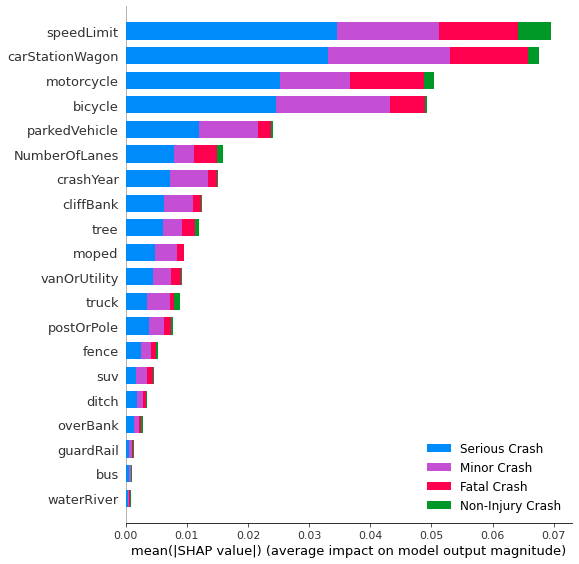

In [86]:
shap.summary_plot(shap_values, test_x.values, plot_type="bar", class_names= class_names, feature_names = test_x.columns)

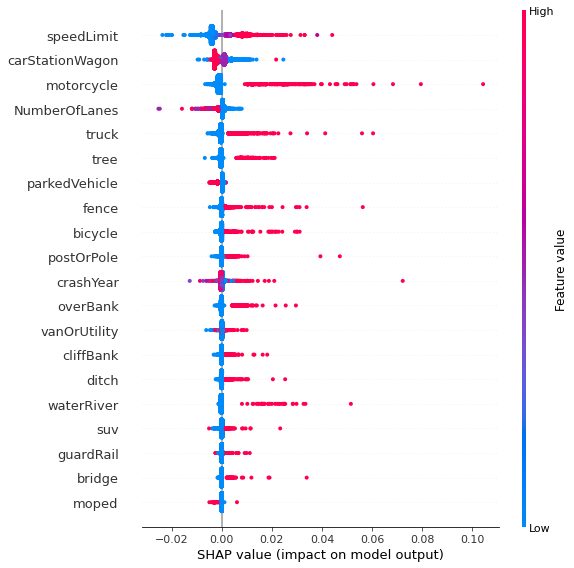

In [47]:
shap.summary_plot(shap_values[0], test_x.values, feature_names = test_x.columns)

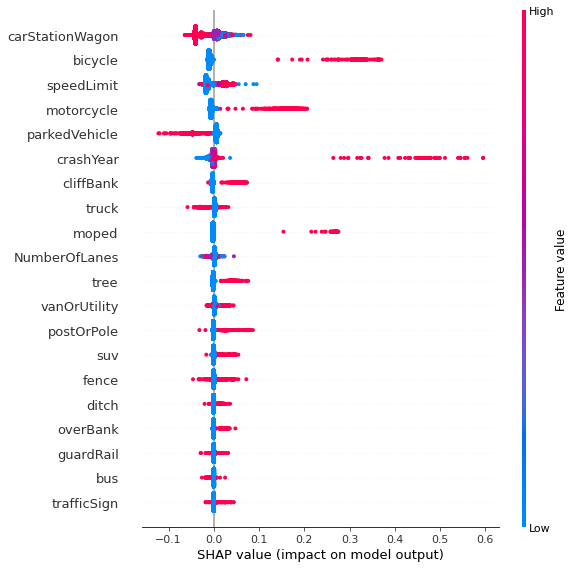

In [48]:
shap.summary_plot(shap_values[1], test_x.values, feature_names = test_x.columns)

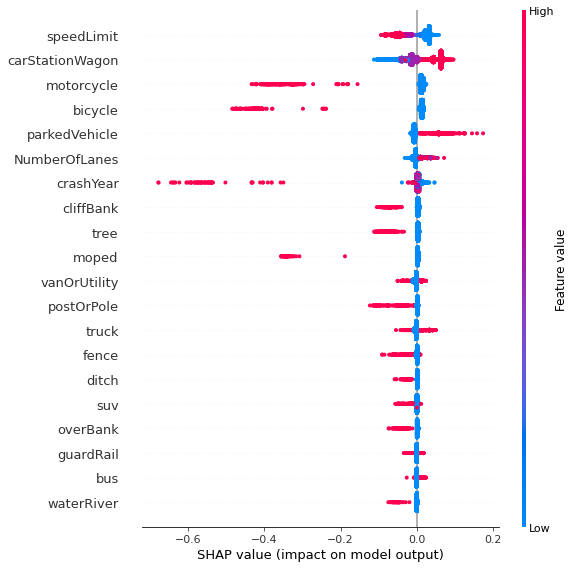

In [49]:
shap.summary_plot(shap_values[2], test_x.values, feature_names = test_x.columns)

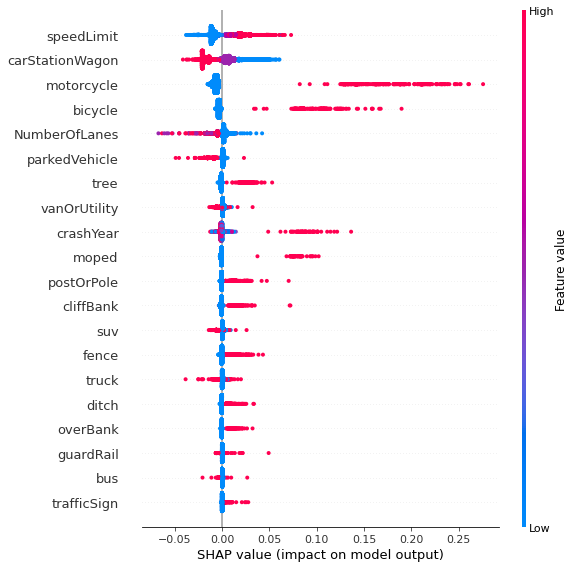

In [50]:
shap.summary_plot(shap_values[3], test_x.values, feature_names = test_x.columns)

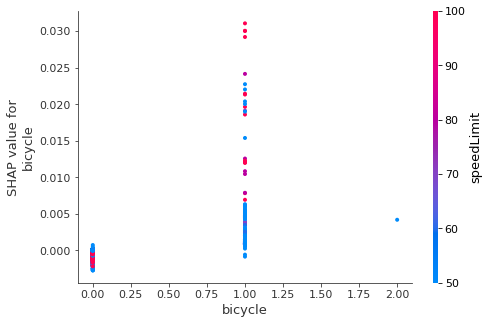

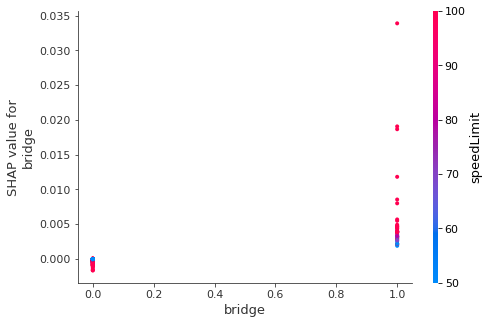

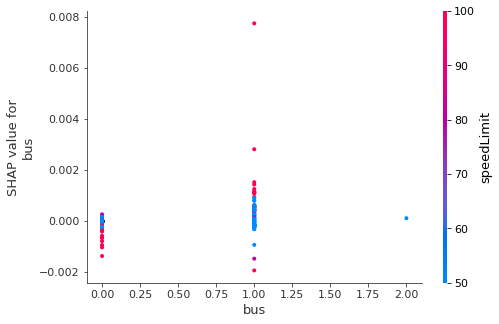

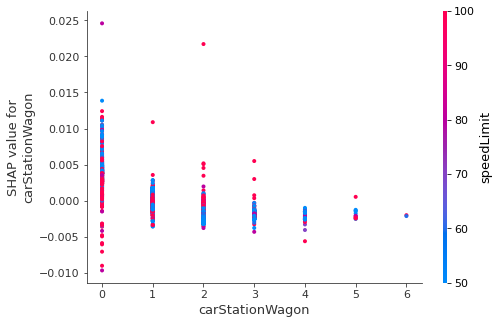

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


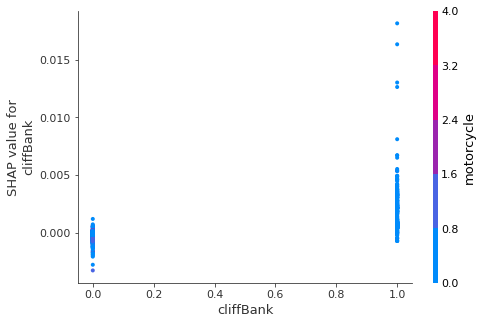

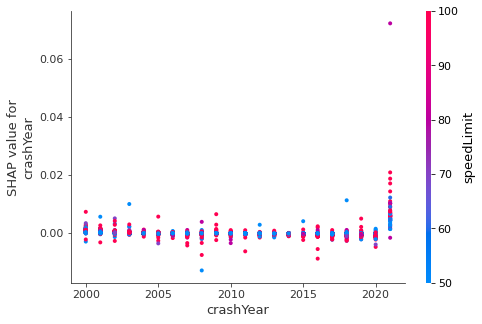

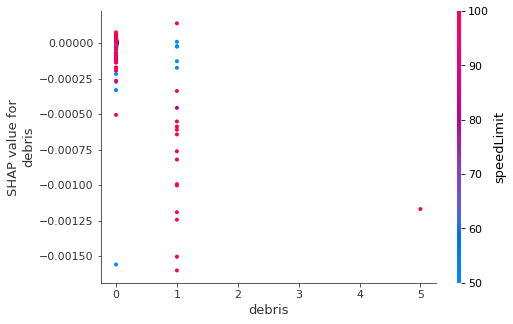

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


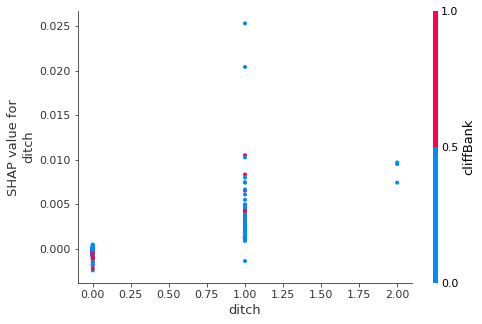

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


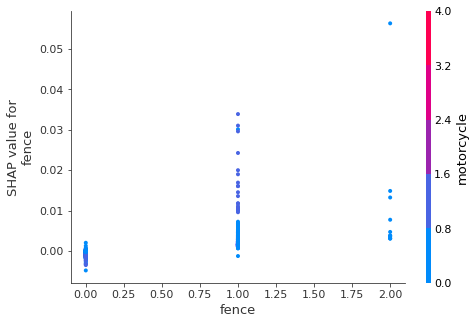

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


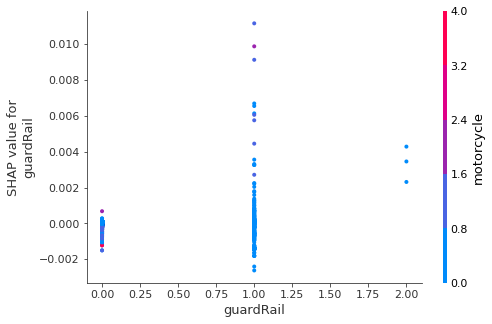

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


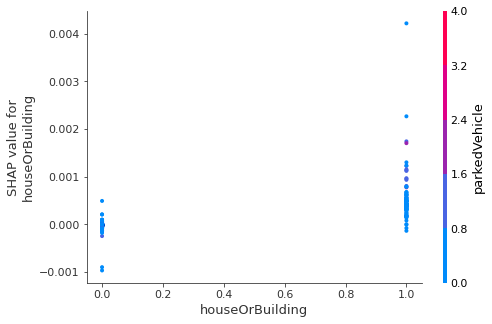

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


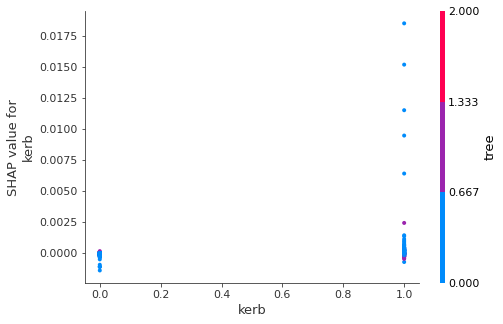

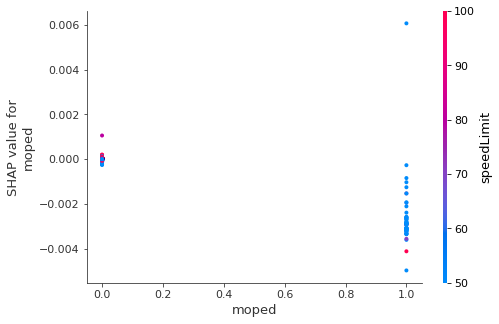

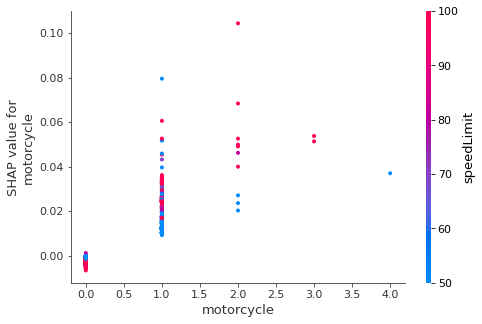

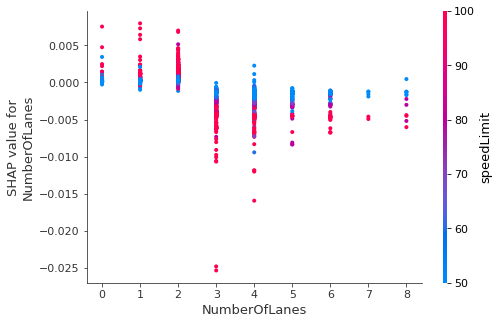

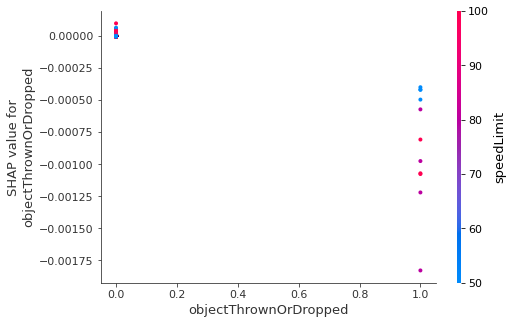

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


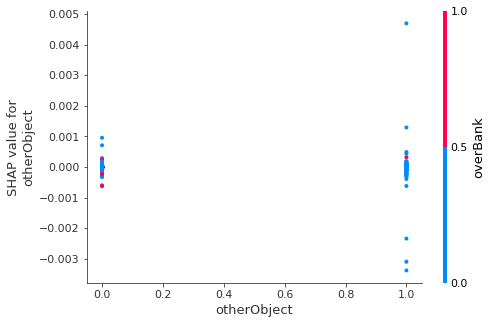

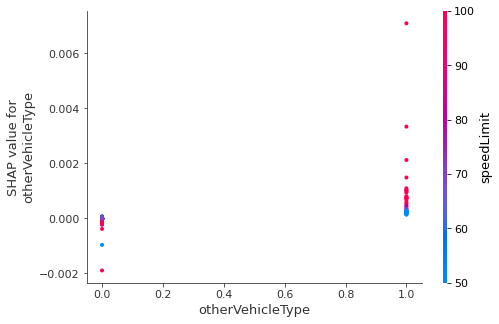

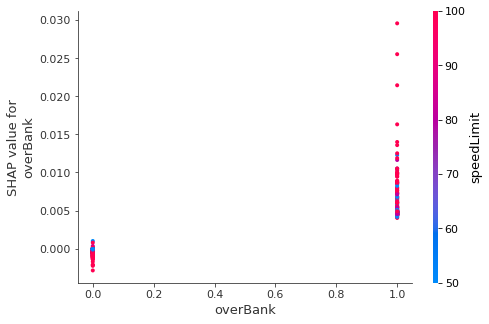

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


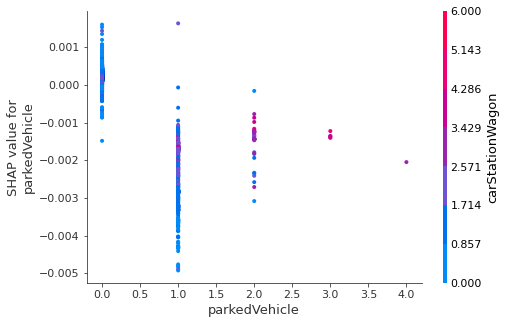

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


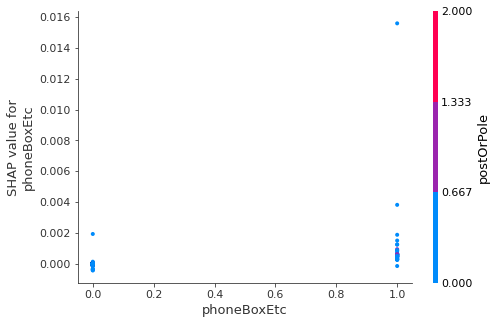

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


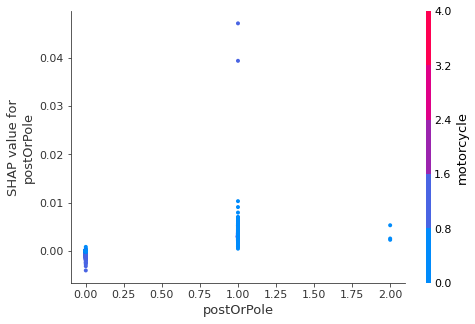

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


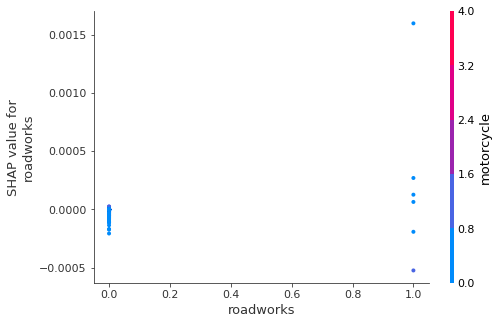

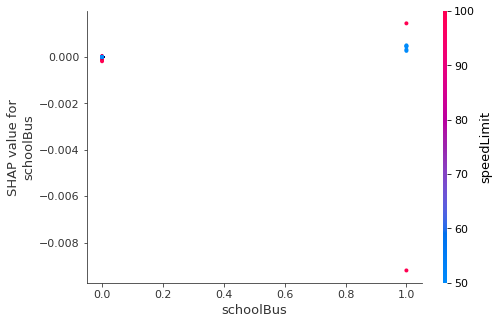

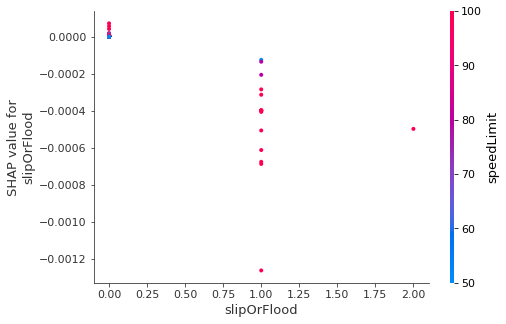

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


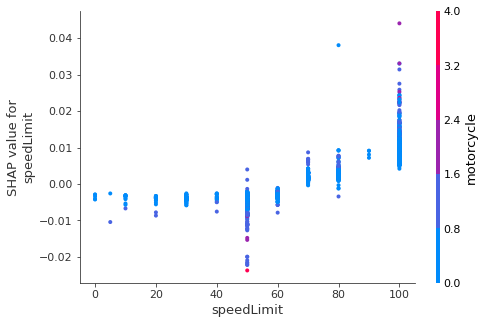

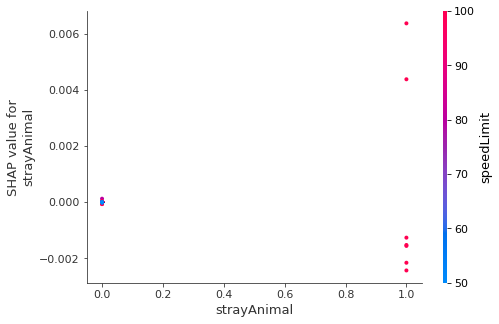

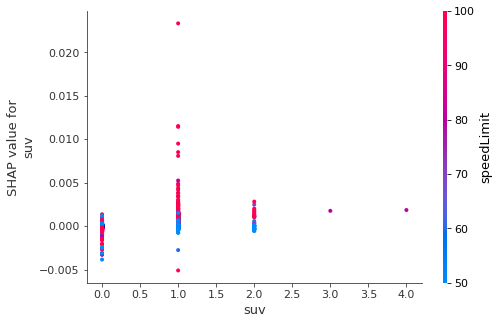

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


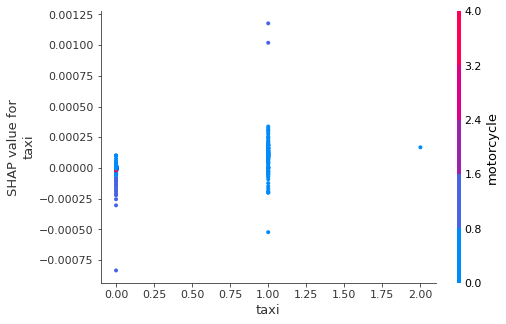

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


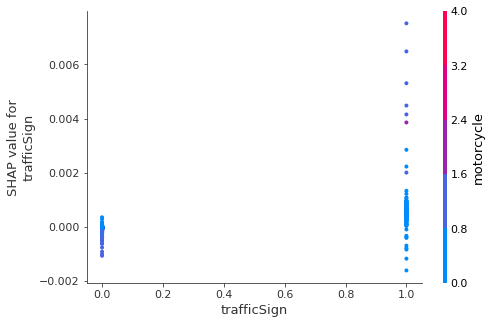

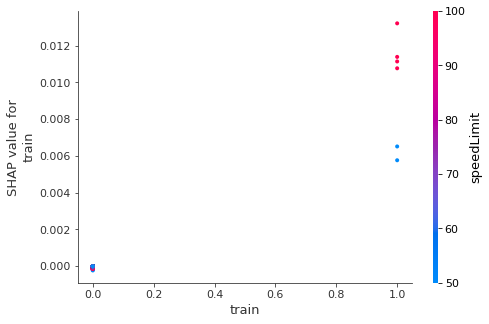

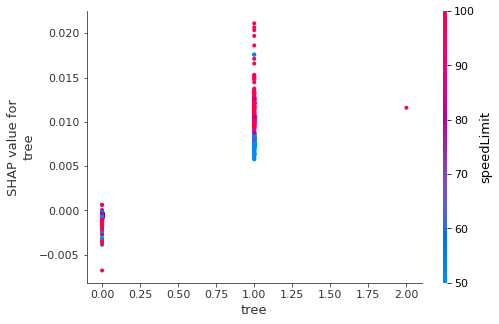

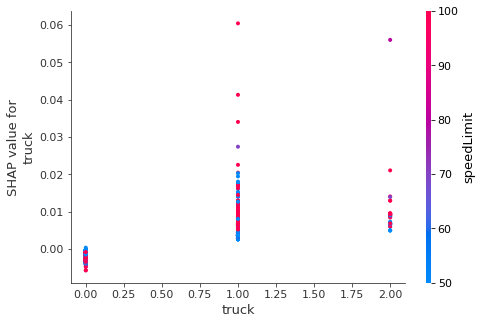

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


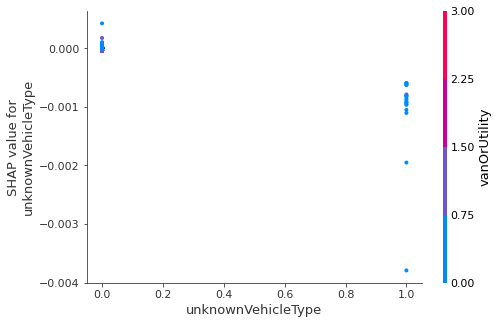

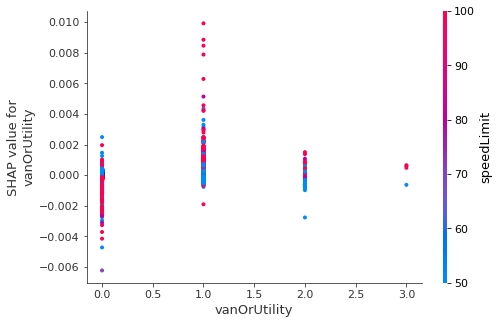

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


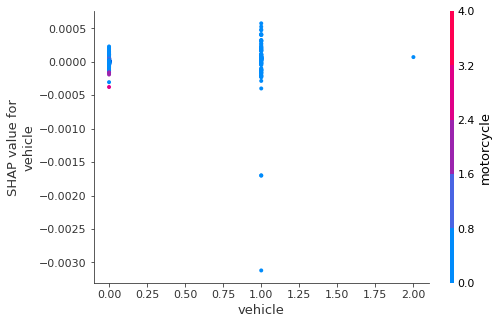

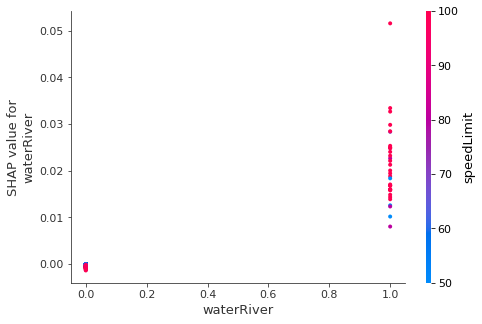

In [63]:
for i in range(0,37):
    shap.dependence_plot(i, shap_values[0], test_x.values, feature_names=test_x.columns)

In [84]:
i=21
shap.force_plot(explainer.expected_value[0], shap_values[0][i], test_x.values[i], feature_names = test_x.columns)

In [67]:
len(shap_values[0][0])

37

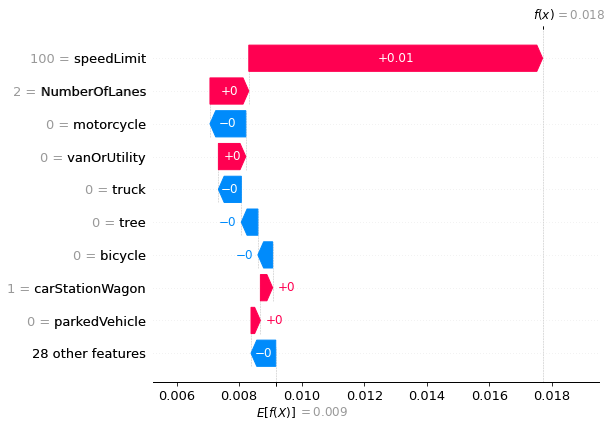

In [93]:
row = 421
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], base_values=explainer.expected_value[0], data=x_test.iloc[row],  feature_names=x_test.columns.tolist()))